In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# Load data
gold_df = pd.read_excel('golde_price_mix - Copy.xlsx')
print(gold_df.shape)
gold_df['Date'] = pd.to_datetime(gold_df['Date']) # convert 'Date' column to datetime format
gold_df.set_index('Date', inplace=True)




(11553, 2)


In [2]:
gold_df.index

DatetimeIndex(['1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-03', '1972-04-03',
               ...
               '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21',
               '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-27',
               '2023-03-28', '2023-03-29'],
              dtype='datetime64[ns]', name='Date', length=11553, freq=None)

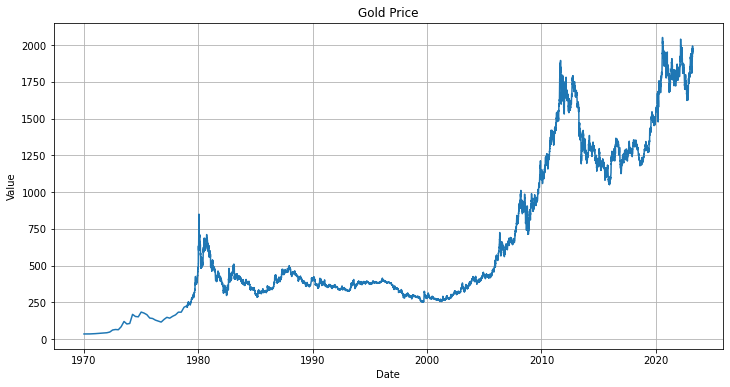

In [3]:
import matplotlib.pyplot as plt

# Plot the gold prices
plt.figure(figsize=(12, 6))
plt.plot(gold_df.index, gold_df['Value'])
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [4]:
# Split data into train and test sets
train_size = int(len(gold_df) * 0.8) # 80% for training
train_data = gold_df.iloc[:train_size]
test_data = gold_df.iloc[train_size:]
test_data
train_size

9242

In [5]:
# Train the SARIMA model
model = SARIMAX(gold_df, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()



D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [6]:
test_data.index[0]



Timestamp('2014-04-14 00:00:00')

In [13]:
# start_date = datetime(2014,4,14)
# end_date = datetime(2023,3,29)
# prediction_dates_1 = pd.date_range(start_date, end_date, freq='D')
# predictions = result.predict(start=len(train_data), end=len(train_data)+len(prediction_dates_1)-1, dynamic=False)

predictions = result.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# # # Make predictions for 2023
# # start_date = datetime(2023, 3, 30) 
# # end_date = datetime(2025, 3, 30)
# # prediction_dates = pd.date_range(start_date, end_date, freq='D')
# # y_pred = result.predict(start=len(gold_df), end=len(gold_df)+len(prediction_dates)-1, dynamic=False)



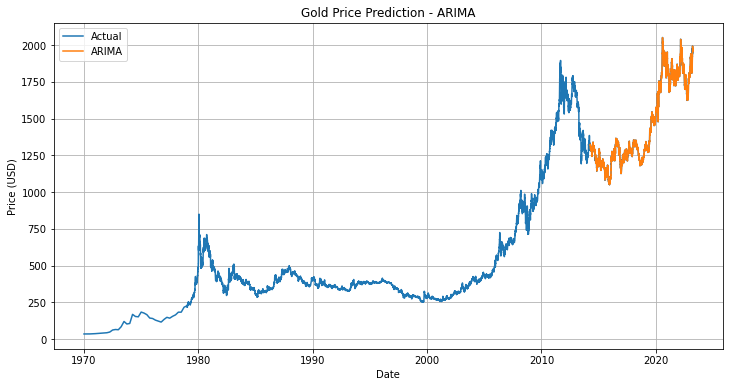

In [14]:
# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(gold_df.index, gold_df['Value'], label='Actual')
plt.plot(predictions.index, predictions, label='ARIMA')
plt.title('Gold Price Prediction - ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
import statsmodels.api as sm

import itertools#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(7,8)# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594862
         Iterations: 2
         Function evaluations: 149
SARIMA(0, 1, 1),(0, 1, 1, 7) - AIC:66453.4243599768


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594748
         Iterations: 2
         Function evaluations: 157
SARIMA(0, 1, 1),(0, 1, 2, 7) - AIC:66453.32517972478


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594755
         Iterations: 3
         Function evaluations: 172
SARIMA(0, 1, 1),(1, 1, 1, 7) - AIC:66453.44921942946


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594830
         Iterations: 3
         Function evaluations: 203
SARIMA(0, 1, 1),(1, 1, 2, 7) - AIC:66456.83037312244


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594340
         Iterations: 3
         Function evaluations: 199
SARIMA(0, 1, 1),(2, 1, 1, 7) - AIC:66447.77838259259


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594746
         Iterations: 3
         Function evaluations: 234
SARIMA(0, 1, 1),(2, 1, 2, 7) - AIC:66457.28704080728


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594641
         Iterations: 2
         Function evaluations: 174
SARIMA(0, 1, 2),(0, 1, 1, 7) - AIC:66451.34372416846


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594540
         Iterations: 2
         Function evaluations: 165
SARIMA(0, 1, 2),(0, 1, 2, 7) - AIC:66451.47418585926


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594546
         Iterations: 3
         Function evaluations: 204
SARIMA(0, 1, 2),(1, 1, 1, 7) - AIC:66451.58384168487


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594612
         Iterations: 3
         Function evaluations: 233
SARIMA(0, 1, 2),(1, 1, 2, 7) - AIC:66454.81723685501


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594138
         Iterations: 3
         Function evaluations: 233
SARIMA(0, 1, 2),(2, 1, 1, 7) - AIC:66446.05480962773


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594538
         Iterations: 3
         Function evaluations: 264
SARIMA(0, 1, 2),(2, 1, 2, 7) - AIC:66455.4364845964


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594973
         Iterations: 2
         Function evaluations: 159
SARIMA(1, 1, 1),(0, 1, 1, 7) - AIC:66457.48143067597


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594862
         Iterations: 2
         Function evaluations: 191
SARIMA(1, 1, 1),(0, 1, 2, 7) - AIC:66457.43396233856


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594867
         Iterations: 3
         Function evaluations: 215
SARIMA(1, 1, 1),(1, 1, 1, 7) - AIC:66457.52191869545


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594940
         Iterations: 3
         Function evaluations: 241
SARIMA(1, 1, 1),(1, 1, 2, 7) - AIC:66460.86890776936


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594439
         Iterations: 3
         Function evaluations: 244
SARIMA(1, 1, 1),(2, 1, 1, 7) - AIC:66451.61709864013


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594861
         Iterations: 3
         Function evaluations: 276
SARIMA(1, 1, 1),(2, 1, 2, 7) - AIC:66461.4049336087


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594399
         Iterations: 2
         Function evaluations: 191
SARIMA(1, 1, 2),(0, 1, 1, 7) - AIC:66448.86536898093


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594288
         Iterations: 2
         Function evaluations: 208
SARIMA(1, 1, 2),(0, 1, 2, 7) - AIC:66448.82728665575


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594294
         Iterations: 3
         Function evaluations: 248
SARIMA(1, 1, 2),(1, 1, 1, 7) - AIC:66448.93635044889


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594366
         Iterations: 3
         Function evaluations: 274
SARIMA(1, 1, 2),(1, 1, 2, 7) - AIC:66452.25333785481


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.593899
         Iterations: 3
         Function evaluations: 274
SARIMA(1, 1, 2),(2, 1, 1, 7) - AIC:66443.6325607646


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594287
         Iterations: 3
         Function evaluations: 309
SARIMA(1, 1, 2),(2, 1, 2, 7) - AIC:66452.8013878442


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594336
         Iterations: 2
         Function evaluations: 192
SARIMA(2, 1, 1),(0, 1, 1, 7) - AIC:66447.70326617095


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594202
         Iterations: 2
         Function evaluations: 208
SARIMA(2, 1, 1),(0, 1, 2, 7) - AIC:66447.23216486923


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594209
         Iterations: 3
         Function evaluations: 250
SARIMA(2, 1, 1),(1, 1, 1, 7) - AIC:66447.35459456798


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594293
         Iterations: 3
         Function evaluations: 282
SARIMA(2, 1, 1),(1, 1, 2, 7) - AIC:66450.91630556484


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.593819
         Iterations: 3
         Function evaluations: 276
SARIMA(2, 1, 1),(2, 1, 1, 7) - AIC:66442.14645203826


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594202
         Iterations: 3
         Function evaluations: 311
SARIMA(2, 1, 1),(2, 1, 2, 7) - AIC:66451.22957539863


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594292
         Iterations: 2
         Function evaluations: 214
SARIMA(2, 1, 2),(0, 1, 1, 7) - AIC:66448.89474891461


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594208
         Iterations: 2
         Function evaluations: 240
SARIMA(2, 1, 2),(0, 1, 2, 7) - AIC:66449.34433626858


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594213
         Iterations: 3
         Function evaluations: 285
SARIMA(2, 1, 2),(1, 1, 1, 7) - AIC:66449.42663740981


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594268
         Iterations: 3
         Function evaluations: 316
SARIMA(2, 1, 2),(1, 1, 2, 7) - AIC:66452.45588917001


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.593825
         Iterations: 3
         Function evaluations: 312
SARIMA(2, 1, 2),(2, 1, 1, 7) - AIC:66444.26269012825


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Optimization terminated successfully.
         Current function value: 3.594206
         Iterations: 3
         Function evaluations: 344
SARIMA(2, 1, 2),(2, 1, 2, 7) - AIC:66453.3002818555


In [ ]:
# 66453 66444 66452 66449 66449 66448 66451 66442 66450 66447  
# 66443
# Optimization terminated successfully.
#          Current function value: 3.593899
#          Iterations: 3
#          Function evaluations: 274
# SARIMA(1, 1, 2),(2, 1, 1, 7) - AIC:66443.6325607646

In [ ]:
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,5,12))
result = model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
predictions = result.predict(start=len(train_data), end=len(gold_df), dynamic=False)


In [ ]:
# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(gold_df.index, gold_df['Value'], label='Actual')
plt.plot(predictions.index, predictions, label='ARIMA')
plt.title('Gold Price Prediction - ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(gold_df['Value'], period=12)
decomposition = stl.fit()



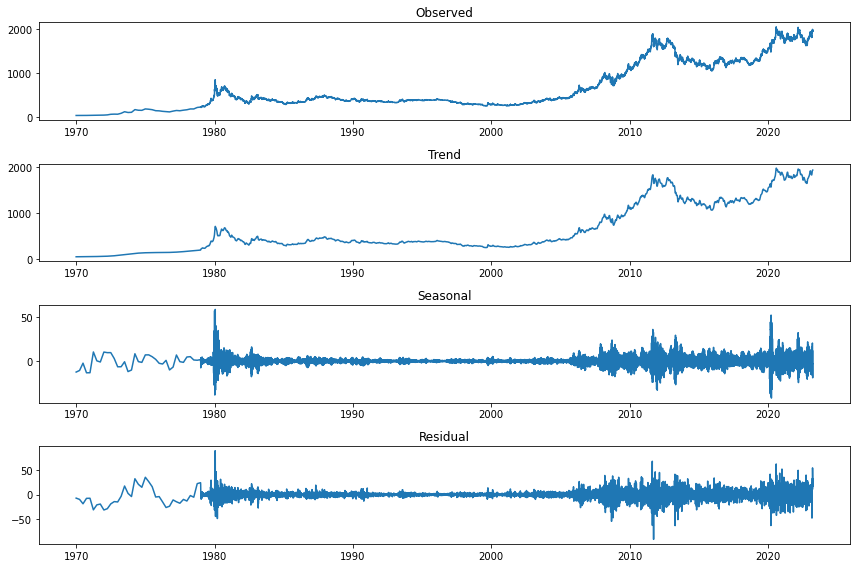

In [16]:
# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(gold_df.index, decomposition.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(gold_df.index, decomposition.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(gold_df.index, decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(gold_df.index, decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

print(f"Mean Absolute Error:", mae)
print(f"Root Mean Squared Error: ", rmse )

Mean Absolute Error: 9.474585811153531
Root Mean Squared Error:  14.020361750262243


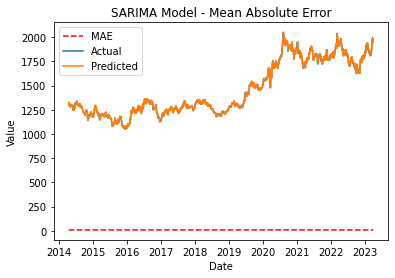

In [19]:
actual_values = test_data['Value']  # Replace 'column_name' with the actual column name in your test_data DataFrame
# Plot the MAE
plt.plot(actual_values.index, [mae] * len(actual_values), linestyle='--', color='red', label='MAE')
plt.plot(actual_values.index, actual_values, label='Actual')
plt.plot(actual_values.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Model - Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:

# Make predictions for 2023
start_date = datetime(2023, 3, 30) 
end_date = datetime(2025, 3, 30)
prediction_dates = pd.date_range(start_date, end_date, freq='D')
y_pred = result.predict(start=len(gold_df), end=len(gold_df)+len(prediction_dates)-1, dynamic=False)



In [ ]:
# Save predictions to a new DataFrame
predictions_df = pd.DataFrame({'Date': prediction_dates, 'Value': y_pred})

# Save predictions to a new CSV file

In [ ]:
predictions_df

In [ ]:
# Save predictions to a new CSV file
predictions_df.to_csv('gold_prediction_flask_1.csv', index=False)